# Project: Wrangling and Analyze Data

Author: MAAROUFI Sirine

#### Table of Contents

* Introduction
* Gathering data
* Assessing data
* Cleaning data
* Storing, Analyzing, and Visualizing

## Introduction
In this project, the goal is to wrangle WeRateDogs Twitter Data. The data will be gathered from different sources, assessed and then cleaned so it will be ready to perform analysis and visualisations on it.

## Data Gathering

#### 1. Enhanced Twitter Archive

In [ ]:
# Import necessary Libraries
import pandas as pd
import numpy as np
import requests
import tweepy
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# load twitter archive
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")

In [ ]:
# Display few lines of the data
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [ ]:
# Display Data's infos
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### 2. Tweet Image Prediction

The file (image_predictions.tsv) is present in each tweet according to a neural network. It is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [ ]:
# Download the file programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
with open('image-predictions.tsv' , 'wb') as file:
    im_predictions = requests.get(url)
    file.write(im_predictions.content)

In [ ]:
# load image predictions
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')
# display Data
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 3. Additional data via the Twitter API

Twitter API file contains tweet id, favorite count and retweet count.

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [ ]:
# load twitter API data
import json
with open('tweet-json.txt') as f:
    twitter_api = pd.DataFrame((json.loads(line) for line in f), columns = ['id', 'favorite_count', 'retweet_count'])

In [ ]:
# Display Data
twitter_api.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [ ]:
# Change column names
twitter_api.columns = ['tweet_id', 'favorites', 'retweets']

In [ ]:
# Display Data
twitter_api.head()

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


## Assessing Data

##### 1. Enhanced Twitter Archive Data

In [ ]:
# Display Data
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [ ]:
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
671,789960241177853952,NaN,NaN,2016-10-22 22:42:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Buddy. His father was a...,7.624645e+17,4.196984e+09,2016-08-08 01:44:46 +0000,https://twitter.com/dog_rates/status/762464539...,12,10,Buddy,None,None,None,None
2011,672245253877968896,NaN,NaN,2015-12-03 02:45:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Snickers. He's adorable. Also comes in t-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672245253...,12,10,Snickers,None,None,None,None
61,880221127280381952,NaN,NaN,2017-06-29 00:27:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jesse. He's a Fetty Woof. His tongue ejec...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880221127...,12,10,Jesse,None,None,None,None
536,807010152071229440,NaN,NaN,2016-12-08 23:53:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lennon. He's a Boopershnoop Pupperdoop...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/807010152...,12,10,Lennon,None,None,None,None
664,790723298204217344,NaN,NaN,2016-10-25 01:14:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Happy. He's a bathtub r...,7.899865e+17,4.196984e+09,2016-10-23 00:27:05 +0000,https://twitter.com/dog_rates/status/789986466...,12,10,Happy,None,None,None,None
935,753398408988139520,NaN,NaN,2016-07-14 01:19:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. Her batteries are low. 12/10 pr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/753398408...,12,10,Scout,None,None,None,None
1731,679844490799091713,NaN,NaN,2015-12-24 02:02:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Willie. He's floating away and needs y...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679844490...,10,10,Willie,None,None,None,None
435,820446719150292993,NaN,NaN,2017-01-15 01:45:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Peaches. She's the ulti...,8.001414e+17,4.196984e+09,2016-11-20 00:59:15 +0000,https://twitter.com/dog_rates/status/800141422...,13,10,Peaches,None,None,None,None
1086,738166403467907072,NaN,NaN,2016-06-02 00:32:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Axel. He's a professional leaf catcher...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/738166403...,12,10,Axel,None,None,None,None
1425,697943111201378304,NaN,NaN,2016-02-12 00:39:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She goes door to door trying t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697943111...,10,10,Cassie,None,None,None,None


In [ ]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [ ]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

##### 2. Tweet Image Prediction   

In [ ]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [ ]:
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
154,668779399630725120,https://pbs.twimg.com/media/CUf7UIaWUAEuKFr.jpg,1,Chesapeake_Bay_retriever,0.285508,True,Weimaraner,0.146832,True,black-footed_ferret,0.060865,False
695,684460069371654144,https://pbs.twimg.com/media/CX-wzZEUwAA4ISM.jpg,1,Labrador_retriever,0.673691,True,Chesapeake_Bay_retriever,0.194897,True,American_Staffordshire_terrier,0.059471,True
596,679527802031484928,https://pbs.twimg.com/media/CW4q7jDWkAA2y8g.jpg,1,mailbox,0.336393,False,cannon,0.158936,False,cuirass,0.052647,False
919,701889187134500865,https://pbs.twimg.com/media/Cb2cfd9WAAEL-zk.jpg,1,French_bulldog,0.902856,True,Staffordshire_bullterrier,0.022634,True,soap_dispenser,0.011973,False
703,684914660081053696,https://pbs.twimg.com/media/CYFOP6cWEAAWp-k.jpg,1,shopping_cart,0.460950,False,chow,0.261288,True,Labrador_retriever,0.074194,True
340,672248013293752320,https://pbs.twimg.com/media/CVROAIfWsAECA5t.jpg,1,Irish_terrier,0.413173,True,Airedale,0.335616,True,toy_poodle,0.027952,True
1327,757393109802180609,https://pbs.twimg.com/media/CoLNAq6WAAAkmdJ.jpg,2,Labrador_retriever,0.787125,True,Chesapeake_Bay_retriever,0.112676,True,Rottweiler,0.048039,True
293,671347597085433856,https://pbs.twimg.com/media/CVEbFDRWsAAkN_7.jpg,1,picket_fence,0.382918,False,rain_barrel,0.108809,False,plastic_bag,0.038878,False
1255,748346686624440324,https://pbs.twimg.com/media/CmKpVtlWAAEnyHm.jpg,1,borzoi,0.596455,True,whippet,0.231428,True,Saluki,0.058261,True
684,683852578183077888,https://pbs.twimg.com/media/CX2ISqSWYAAEtCF.jpg,1,toy_poodle,0.551352,True,teddy,0.180678,False,miniature_poodle,0.164095,True


In [ ]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


##### 3. Twitter API Data

In [ ]:
twitter_api.sample(10)

,tweet_id,favorites,retweets
2107,670449342516494336,1264,729
1412,698710712454139905,2710,774
2066,671138694582165504,996,448
991,748575535303884801,6696,2272
450,818627210458333184,24597,8564
529,808134635716833280,0,6961
1995,672591271085670400,782,207
2314,666649482315059201,923,608
421,821813639212650496,0,3839
1242,711743778164514816,3095,1101


In [ ]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tweet_id   2354 non-null   int64
 1   favorites  2354 non-null   int64
 2   retweets   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Quality issues
* **Enhanced Twitter Archive Data**
    1. The dataset is **incomplete**. It contains 2075 samples not 5000.
    2. "<a href=" exists in the **source** column
    3. **Incorrect Datatypes**:(retweeted_status_timestamp, timestamp..)
    4. **Missing Data** in in_reply_to_status_id and in_reply_to_user_id
    5. "None" instead of NaN in **Doggo**,**floofer**,**pupper**,**puppo**
    6. In **Sample 193**, name is quite (incorrect).
    7. Delete uncessary columns for Analysis(retweeted_status_timestamp...)
    8. In **sample 2311**, name is a instead of Octaviath.
    

* **Image Predictions Data**
    1. The dataset is **incomplete**. It contains around 2000 samples not 5000.
    2. None descriptive columns' names.


* **Twitter API Data**
    1. The dataset is **incomplete**. It contains around 2000 samples not 5000.


### Tidiness issues
* **Enhanced Twitter Archive Data**
    1. **timestamp** contains two information Date and time. So we can seperate these two into two columns.
    2. **Doggo**,**floofer**,**pupper**,**puppo** should be in one column.


## Cleaning Data

In [ ]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
twitter_api_clean = twitter_api.copy()
image_predictions_clean = image_predictions.copy()

### Issue #1: Delete unnecessary columns for Analysis(retweeted_status_timestamp...) + Drop Duplicated rows(Retweets)

#### Define
Delete the columns giving informations about the retweets.

#### Code

In [ ]:
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [ ]:
# Keep only necessary columns
cols = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text','expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_clean = twitter_archive_clean[cols]

In [ ]:
# Drop Retweets
twitter_archive_clean.drop_duplicates(inplace = True)
twitter_api_clean.drop_duplicates(inplace = True)
image_predictions_clean.drop_duplicates(inplace = True)

#### Test

In [ ]:
twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [ ]:
twitter_api_clean

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


In [ ]:
image_predictions_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### Issue #2: Doggo,floofer,pupper,puppo should be in one column.

#### Define
Dog's categories should be in one column "dog_cat"

#### Code

In [ ]:
!pip install pandas==1.1.0

In [ ]:
import pandas as pd
pd.__version__

'0.23.3'

In [ ]:
# Add new column to the data that contains dog types
twitter_archive_clean = pd.melt(twitter_archive_clean,
                                          id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
                                                   'source', 'text','expanded_urls', 'rating_numerator', 'rating_denominator',
                                                   'name'],
                                          var_name='dog_cat', value_name='dog_type', ignore_index = True)
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.dog_type != "None"]

twitter_archive_clean = twitter_archive_clean.drop('dog_cat', axis=1)

#### Test

In [ ]:
twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo
99,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo
108,871515927908634625,NaN,NaN,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo
110,871102520638267392,NaN,NaN,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/animalcog/status/871075758...,14,10,None,doggo
...,...,...,...,...,...,...,...,...,...,...,...
8015,752519690950500352,NaN,NaN,2016-07-11 15:07:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Hopefully this puppo on a swing will help get ...,https://twitter.com/dog_rates/status/752519690...,11,10,None,puppo
8029,751132876104687617,NaN,NaN,2016-07-07 19:16:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He's just so damn happy. 10/10...,https://twitter.com/dog_rates/status/751132876...,10,10,Cooper,puppo
8103,744995568523612160,NaN,NaN,2016-06-20 20:49:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Abby. She got her face stuck in a glas...,https://twitter.com/dog_rates/status/744995568...,9,10,Abby,puppo
8116,743253157753532416,NaN,NaN,2016-06-16 01:25:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kilo. He cannot reach the snackum. Nif...,https://twitter.com/dog_rates/status/743253157...,10,10,Kilo,puppo


### Issue #3: Correct timestamp type then Seperate  the informations

#### Define
* Correct timestamp type from object to Datetime.
* Seperate the informations.

#### Code

In [ ]:
# Correct the datatyp
twitter_archive_clean.timestamp = twitter_archive_clean.timestamp.astype('datetime64')

In [ ]:
# Seperate date and time
# Month
twitter_archive_clean['tweet_month'] = twitter_archive_clean.timestamp.dt.month
# Year
twitter_archive_clean['tweet_year'] = twitter_archive_clean.timestamp.dt.year
# Day
twitter_archive_clean['tweet_day'] = twitter_archive_clean.timestamp.dt.day
# Hour
twitter_archive_clean['tweet_Hour'] = twitter_archive_clean.timestamp.dt.hour

#### Test

In [ ]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 9 to 8151
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               394 non-null    int64         
 1   in_reply_to_status_id  9 non-null      float64       
 2   in_reply_to_user_id    9 non-null      float64       
 3   timestamp              394 non-null    datetime64[ns]
 4   source                 394 non-null    object        
 5   text                   394 non-null    object        
 6   expanded_urls          388 non-null    object        
 7   rating_numerator       394 non-null    int64         
 8   rating_denominator     394 non-null    int64         
 9   name                   394 non-null    object        
 10  dog_type               394 non-null    object        
 11  tweet_month            394 non-null    int64         
 12  tweet_year             394 non-null    int64         
 13  twee

### Issue #4: "<a href=" exists in the **source** column (Enhanced Twitter Archive)

#### Define:
Delete incessary characters from the source column.

#### Code

In [ ]:
twitter_archive_clean['source'] = twitter_archive_clean.source.str.replace('<a href=','').str.replace(' rel="nofollow">Twitter for iPhone</a>','').str.replace(' rel="nofollow">Vine - Make a Scene</a>','').str.replace(' rel="nofollow">Twitter Web Client</a>','').str.replace(' rel="nofollow">TweetDeck</a>','').str.replace('=','')

#### Test

In [ ]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,tweet_month,tweet_year,tweet_day,tweet_Hour
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"""http://twitter.com/download/iphone""",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,7,2017,26,15
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42,"""http://twitter.com/download/iphone""",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,7,2017,9,21
99,872967104147763200,NaN,NaN,2017-06-09 00:02:31,"""http://twitter.com/download/iphone""",Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo,6,2017,9,0
108,871515927908634625,NaN,NaN,2017-06-04 23:56:03,"""http://twitter.com/download/iphone""",This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,6,2017,4,23
110,871102520638267392,NaN,NaN,2017-06-03 20:33:19,"""http://twitter.com/download/iphone""",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/animalcog/status/871075758...,14,10,None,doggo,6,2017,3,20


### Issue #5: Image Predictions dataset columns' names

#### Define
* Change column names to more descriptive ones that give more informations about the content.

#### Code

In [ ]:
image_predictions_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [ ]:
# change columns' names
image_predictions_clean.columns = ['tweet_id',
                            'image_url',
                            'img_number',
                            'prediction1',
                            'prediction1_confidence',
                            'prediction1_isdog',
                            'prediction2',
                            'prediction2_confidence',
                            'prediction2_isdog',
                            'prediction3',
                            'prediction3_confidence',
                            'prediction3_isdog']

#### Test

In [ ]:
image_predictions_clean.columns

Index(['tweet_id', 'image_url', 'img_number', 'prediction1',
       'prediction1_confidence', 'prediction1_isdog', 'prediction2',
       'prediction2_confidence', 'prediction2_isdog', 'prediction3',
       'prediction3_confidence', 'prediction3_isdog'],
      dtype='object')

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [ ]:
# Merge Datasets
twitter_archive_clean = pd.merge(twitter_archive_clean, image_predictions_clean,
                            on=['tweet_id'], how='left')
twitter_archive_clean = pd.merge(twitter_archive_clean, twitter_api_clean,
                            on=['tweet_id'], how='left')

In [ ]:
twitter_archive_master = twitter_archive_clean.copy()
twitter_archive_master.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data

In [ ]:
# Display Data
twitter_archive_master.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,prediction1_confidence,prediction1_isdog,prediction2,prediction2_confidence,prediction2_isdog,prediction3,prediction3_confidence,prediction3_isdog,favorites,retweets
3,871515927908634625,NaN,NaN,2017-06-04 23:56:03,"""http://twitter.com/download/iphone""",This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,...,0.974781,True,briard,0.020041,True,swab,0.003228,False,20730.0,3628.0
248,696518437233913856,NaN,NaN,2016-02-08 02:18:30,"""http://twitter.com/download/iphone""",Oh my god 10/10 for every little hot dog pupper,NaN,10,10,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4274.0,1887.0
210,724004602748780546,NaN,NaN,2016-04-23 22:38:43,"""http://twitter.com/download/iphone""",This is Luther. He saw a ghost. Spooked af. 11...,https://twitter.com/dog_rates/status/724004602...,11,10,Luther,...,0.950526,False,pug,0.018877,True,quilt,0.007628,False,4561.0,1790.0


In [ ]:
twitter_archive_master.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_type', 'tweet_month', 'tweet_year',
       'tweet_day', 'tweet_Hour', 'image_url', 'img_number', 'prediction1',
       'prediction1_confidence', 'prediction1_isdog', 'prediction2',
       'prediction2_confidence', 'prediction2_isdog', 'prediction3',
       'prediction3_confidence', 'prediction3_isdog', 'favorites', 'retweets'],
      dtype='object')

In [ ]:
twitter_archive_master.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,tweet_month,tweet_year,tweet_day,tweet_Hour,img_number,prediction1_confidence,prediction2_confidence,prediction3_confidence,favorites,retweets
count,3.940000e+02,9.000000e+00,9.000000e+00,394.000000,394.0,394.000000,394.000000,394.000000,394.000000,334.000000,334.000000,334.000000,334.000000,393.000000,393.000000
mean,7.521376e+17,7.417154e+17,8.116723e+16,11.220812,10.0,6.251269,2016.048223,14.794416,9.692893,1.260479,0.619218,0.134389,0.055332,9873.402036,4349.557252
std,6.329196e+16,3.829648e+16,2.435017e+17,1.898030,0.0,4.081898,0.617975,8.821433,8.684144,0.649181,0.266532,0.105794,0.049490,15386.550210,7875.183338
min,6.721600e+17,6.706684e+17,1.584641e+07,3.000000,10.0,1.000000,2015.000000,1.000000,0.000000,1.000000,0.059033,0.000010,0.000001,0.000000,26.000000
25%,6.889730e+17,7.331095e+17,4.196984e+09,10.000000,10.0,2.000000,2016.000000,7.000000,1.000000,1.000000,0.397529,0.049117,0.013876,2414.000000,983.000000
50%,7.478075e+17,7.476487e+17,4.196984e+09,11.000000,10.0,6.000000,2016.000000,14.000000,4.000000,1.000000,0.658357,0.110581,0.039628,4681.000000,1972.000000
75%,8.022650e+17,7.638652e+17,4.196984e+09,12.000000,10.0,10.750000,2016.000000,22.000000,18.000000,1.000000,0.845921,0.196966,0.085048,11506.000000,4169.000000
max,8.902403e+17,8.008580e+17,7.305050e+17,27.000000,10.0,12.000000,2017.000000,31.000000,23.000000,4.000000,0.999984,0.467678,0.245653,132810.000000,79515.000000


### Insights:
1. Most commun dog breed

2. Best rated dog breed

3. Dog types

### Insight #1: Most common dog breed

##### 1st prediction

In [ ]:
twitter_archive_master.prediction1.value_counts()

golden_retriever      41
Labrador_retriever    17
Pembroke              13
Pomeranian             9
Chihuahua              8
                      ..
ice_lolly              1
koala                  1
Christmas_stocking     1
bison                  1
Shih-Tzu               1
Name: prediction1, Length: 137, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

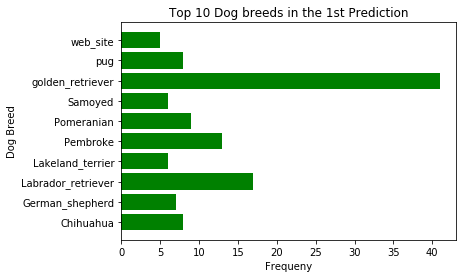

In [ ]:
# Plot a bar plot
df_dog_breed = pd.DataFrame(twitter_archive_master.prediction1.value_counts()[:10])
x = df_dog_breed.index
y = df_dog_breed.prediction1
plt.barh(x,y, color='green')
plt.xlabel("Frequeny")
plt.ylabel("Dog Breed")
plt.title("Top 10 Dog breeds in the 1st Prediction")
plt.show

###### Golden Retriever and Labrador Retriever are the most popular dog breeds in the 1st prediction.

##### 2nd Prediction

In [ ]:
twitter_archive_master.prediction2.value_counts()

Labrador_retriever          31
golden_retriever            12
cocker_spaniel              10
Chesapeake_Bay_retriever    10
Chihuahua                    9
                            ..
barrel                       1
borzoi                       1
otterhound                   1
ox                           1
goldfish                     1
Name: prediction2, Length: 139, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

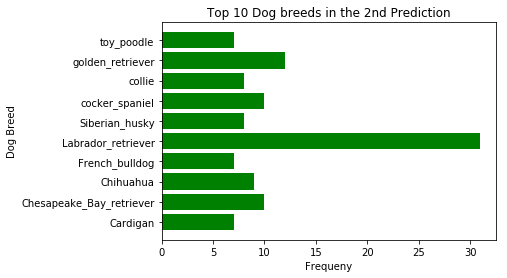

In [ ]:
# Plot a bar plot
df_dog_breed = pd.DataFrame(twitter_archive_master.prediction2.value_counts()[:10])
x = df_dog_breed.index
y = df_dog_breed.prediction2
plt.barh(x,y, color='green')
plt.xlabel("Frequeny")
plt.ylabel("Dog Breed")
plt.title("Top 10 Dog breeds in the 2nd Prediction")
plt.show

###### Golden Retriever and Labrador Retriever are the most popular dog breeds in the 2nd prediction.

##### 3rd Prediction

In [ ]:
twitter_archive_master.prediction3.value_counts()

Labrador_retriever                12
kelpie                            10
malamute                           9
kuvasz                             7
Tibetan_terrier                    7
                                  ..
cocker_spaniel                     1
American_Staffordshire_terrier     1
sandbar                            1
sea_cucumber                       1
Shih-Tzu                           1
Name: prediction3, Length: 160, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

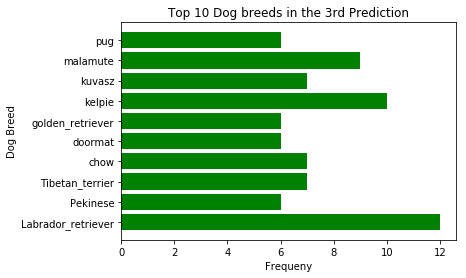

In [ ]:
# Plot a bar plot
df_dog_breed = pd.DataFrame(twitter_archive_master.prediction3.value_counts()[:10])
x = df_dog_breed.index
y = df_dog_breed.prediction3
plt.barh(x,y, color='green')
plt.xlabel("Frequeny")
plt.ylabel("Dog Breed")
plt.title("Top 10 Dog breeds in the 3rd Prediction")
plt.show

###### Labrador Retriever and Kelpie are the most popular dog breeds in the 3rd prediction.

### The most common predicted dog breeds are Golden Retriever, Labrador Retriever and Kelpie.

### Insight #2: Best rated dog breed

##### 1st Prediction

In [ ]:
# Add rating column to the dataset
twitter_archive_master['Rating'] = twitter_archive_master.rating_numerator / twitter_archive_master.rating_denominator

In [ ]:
df_dog_breed = twitter_archive_master.groupby('prediction1').mean()
df_dog_breed.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,tweet_month,tweet_year,tweet_day,tweet_Hour,img_number,prediction1_confidence,prediction2_confidence,prediction3_confidence,favorites,retweets,Rating
prediction1,,,,,,,,,,,,,,,,
Airedale,7.562758e+17,NaN,NaN,10.000000,10.0,7.000000,2016.000000,21.0,23.000000,1.000000,0.602957,0.086981,0.086276,7114.000000,1738.000000,1.000000
American_Staffordshire_terrier,7.828325e+17,NaN,NaN,11.666667,10.0,5.666667,2016.333333,13.0,6.333333,1.333333,0.741836,0.133396,0.040380,8117.333333,2485.333333,1.166667
American_black_bear,7.505062e+17,NaN,NaN,8.000000,10.0,7.000000,2016.000000,6.0,1.000000,1.000000,0.219166,0.214715,0.091685,4934.000000,1316.000000,0.800000
Bedlington_terrier,7.903581e+17,NaN,NaN,11.000000,10.0,4.500000,2016.500000,8.0,12.500000,1.000000,0.395849,0.087723,0.078515,9051.000000,1908.500000,1.100000
Bernese_mountain_dog,6.962426e+17,NaN,NaN,10.500000,10.0,2.000000,2016.000000,7.5,19.500000,1.500000,0.977165,0.012807,0.004957,3593.500000,1173.500000,1.050000


In [ ]:
df_dog_breed_sorted = df_dog_breed['Rating'].sort_values()

df_dog_breed_sorted.tail()

prediction1
standard_poodle            1.4
prison                     1.4
pedestal                   1.4
black-and-tan_coonhound    1.4
clumber                    2.7
Name: Rating, dtype: float64

#### 2nd Prediction

In [ ]:
df_dog_breed = twitter_archive_master.groupby('prediction2').mean()
df_dog_breed.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,tweet_month,tweet_year,tweet_day,tweet_Hour,img_number,prediction1_confidence,prediction2_confidence,prediction3_confidence,favorites,retweets,Rating
prediction2,,,,,,,,,,,,,,,,
Afghan_hound,7.514569e+17,NaN,NaN,12.0,10.0,7.0,2016.000000,8.000000,16.0,1.0,0.714409,0.066163,0.028413,3516.000000,1127.0,1.20
Airedale,6.965270e+17,NaN,NaN,9.0,10.0,2.0,2016.000000,9.000000,2.0,1.0,0.496058,0.120932,0.054355,2852.000000,779.0,0.90
American_Staffordshire_terrier,7.957678e+17,NaN,NaN,12.0,10.0,3.0,2016.666667,8.333333,7.0,1.0,0.700953,0.193776,0.063281,13823.666667,7418.0,1.20
Angora,7.845061e+17,NaN,NaN,12.5,10.0,4.0,2016.500000,8.000000,9.0,1.0,0.492094,0.231362,0.109963,26193.000000,8594.5,1.25
Appenzeller,6.851693e+17,NaN,NaN,11.0,10.0,1.0,2016.000000,7.000000,18.0,1.0,0.975096,0.014578,0.005943,4489.000000,1620.0,1.10


In [ ]:
df_dog_breed_sorted = df_dog_breed['Rating'].sort_values()

df_dog_breed_sorted.tail(10)

prediction2
boathouse       1.30
dalmatian       1.30
ice_bear        1.30
necklace        1.30
vizsla          1.35
comic_book      1.40
fountain        1.40
oscilloscope    1.40
printer         1.40
palace          1.40
Name: Rating, dtype: float64

#### 3rd Prediction

In [ ]:
df_dog_breed = twitter_archive_master.groupby('prediction3').mean()
df_dog_breed.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,tweet_month,tweet_year,tweet_day,tweet_Hour,img_number,prediction1_confidence,prediction2_confidence,prediction3_confidence,favorites,retweets,Rating
prediction3,,,,,,,,,,,,,,,,
Afghan_hound,6.725950e+17,NaN,NaN,9.0,10.0,12.0,2015.0,4.0,1.0,1.0,0.755945,0.082337,0.027037,1411.0,661.0,0.90
Airedale,6.800157e+17,NaN,NaN,11.5,10.0,12.0,2015.0,24.0,12.5,1.0,0.309860,0.245941,0.135306,2719.5,779.0,1.15
American_Staffordshire_terrier,8.149865e+17,NaN,NaN,11.0,10.0,12.0,2016.0,31.0,0.0,1.0,0.999828,0.000068,0.000034,8485.0,1505.0,1.10
Appenzeller,7.073159e+17,NaN,NaN,10.0,10.0,3.0,2016.0,8.0,21.0,2.0,0.979235,0.011037,0.003971,2698.0,727.0,1.00
Arabian_camel,6.881794e+17,NaN,NaN,10.0,10.0,1.0,2016.0,16.0,2.0,1.0,0.811520,0.024820,0.015155,2328.0,669.0,1.00


In [ ]:
df_dog_breed_sorted = df_dog_breed['Rating'].sort_values()

df_dog_breed_sorted.tail()

prediction3
desktop_computer           1.400000
brass                      1.400000
hand-held_computer         1.400000
black-and-tan_coonhound    1.400000
Lhasa                      1.666667
Name: Rating, dtype: float64

###  * The best-rated dog breed in the 1st prediction is Clumber.
###  * The best-rated dog breed in the 2nd prediction are comic_book, fountain, oscilloscope, printer, and palace.   
###  * The best-rated dog breed in the 3rd prediction is Lhasa.

### Insight #3: Dog types

In [ ]:
twitter_archive_master.dog_type.value_counts()


pupper     257
doggo       97
puppo       30
floofer     10
Name: dog_type, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

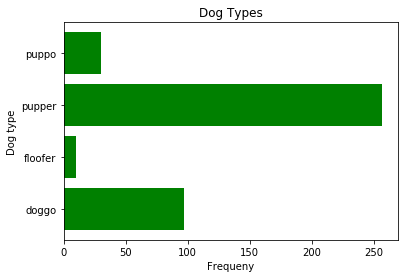

In [ ]:
# Plot a bar plot
df_dog_type = pd.DataFrame(twitter_archive_master.dog_type.value_counts())
x = df_dog_type.index
y = df_dog_type.dog_type
plt.barh(x,y, color='green')
plt.xlabel("Frequeny")
plt.ylabel("Dog type")
plt.title("Dog Types")
plt.show

#### The type pupper is the most popular dog type

### Conclusion

In this project, we went through the whole process of Data Wrangling from Gathering Data through differents methods to Assessing it manually and programatically and finaly Cleaning it.
Then we used this data to conduct some analysis and visualisations.
